In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('mhealth_raw_data.csv')

* Column 1: acceleration from the chest sensor (X axis)
* Column 2: acceleration from the chest sensor (Y axis)
* Column 3: acceleration from the chest sensor (Z axis)
* Column 4: electrocardiogram signal (lead 1)
* Column 5: electrocardiogram signal (lead 2)
* Column 6: acceleration from the left-ankle sensor (X axis)
* Column 7: acceleration from the left-ankle sensor (Y axis)
* Column 8: acceleration from the left-ankle sensor (Z axis)
* Column 9: gyro from the left-ankle sensor (X axis)
* Column 10: gyro from the left-ankle sensor (Y axis)
* Column 11: gyro from the left-ankle sensor (Z axis)
* Column 13: magnetometer from the left-ankle sensor (X axis)
* Column 13: magnetometer from the left-ankle sensor (Y axis)
* Column 14: magnetometer from the left-ankle sensor (Z axis)
* Column 15: acceleration from the right-lower-arm sensor (X axis)
* Column 16: acceleration from the right-lower-arm sensor (Y axis)
* Column 17: acceleration from the right-lower-arm sensor (Z axis)
* Column 18: gyro from the right-lower-arm sensor (X axis)
* Column 19: gyro from the right-lower-arm sensor (Y axis)
* Column 20: gyro from the right-lower-arm sensor (Z axis)
* Column 21: magnetometer from the right-lower-arm sensor (X axis)
* Column 22: magnetometer from the right-lower-arm sensor (Y axis)
* Column 23: magnetometer from the right-lower-arm sensor (Z axis)
* Column 24: Label (0 for the null class)

# EDA

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [3]:
data.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [18]:
data.corr().style.background_gradient(cmap='coolwarm')

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
alx,1.000000,0.017623,-0.071447,0.062249,0.086861,-0.034433,-0.051124,0.060467,-0.003893,-0.025895,0.063999,0.016274,0.052885
aly,0.017623,1.000000,0.077962,0.049371,0.350496,0.058061,0.067072,0.105946,0.092445,0.049759,0.152128,0.105169,0.000006
alz,-0.071447,0.077962,1.000000,0.029332,0.164673,0.126219,-0.124775,0.192842,0.086563,0.042051,0.076887,-0.004969,-0.087824
glx,0.062249,0.049371,0.029332,1.000000,0.138167,0.111437,0.015465,-0.003553,0.058735,0.368314,0.027308,0.591376,0.114137
gly,0.086861,0.350496,0.164673,0.138167,1.000000,0.005295,-0.079234,0.139140,0.082565,0.106395,0.204324,0.124094,0.034683
glz,-0.034433,0.058061,0.126219,0.111437,0.005295,1.000000,0.064995,0.034535,0.052691,-0.153966,0.420649,0.345874,-0.063998
arx,-0.051124,0.067072,-0.124775,0.015465,-0.079234,0.064995,1.000000,-0.166167,0.090329,0.378308,-0.221799,0.099683,-0.000982
ary,0.060467,0.105946,0.192842,-0.003553,0.139140,0.034535,-0.166167,1.000000,0.145271,-0.189298,0.592062,0.084862,0.022006
arz,-0.003893,0.092445,0.086563,0.058735,0.082565,0.052691,0.090329,0.145271,1.000000,0.155024,0.104626,0.396981,-0.042810
grx,-0.025895,0.049759,0.042051,0.368314,0.106395,-0.153966,0.378308,-0.189298,0.155024,1.000000,-0.302279,0.100508,0.052024


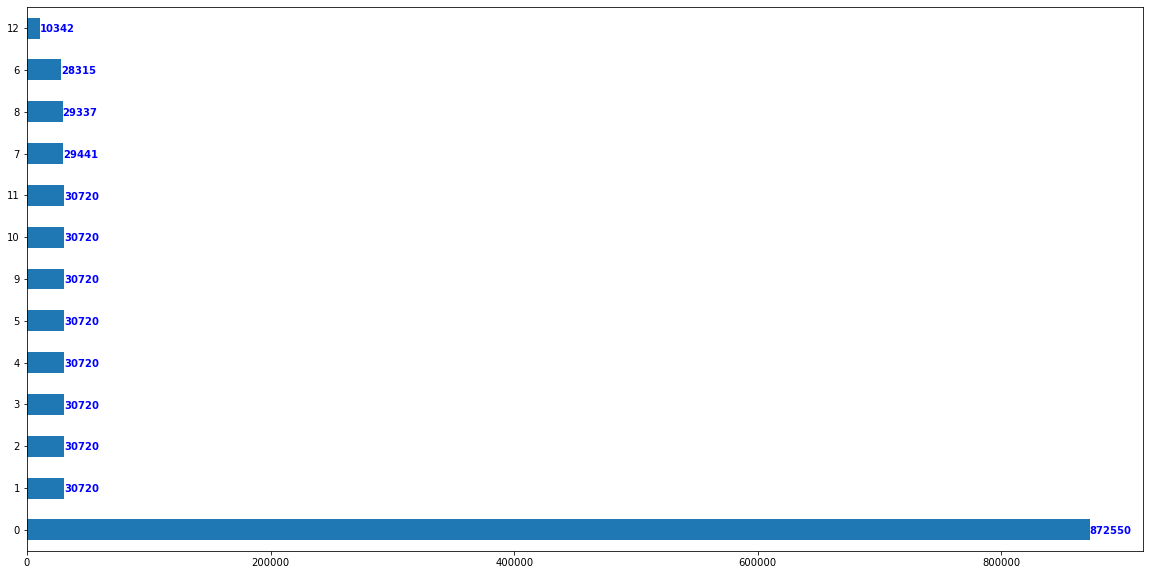

In [4]:
axes = data.Activity.value_counts().plot.barh(figsize=(20, 10))

for i, v in enumerate(data.Activity.value_counts()):
    axes.text(v, i-0.1, str(v), color='blue', fontweight='bold')

Очень серьезный дизбаланс классов. Значит,позже используем class_weight и соответствующую метрику (F-score, ROC-AUC или что-то подобное)

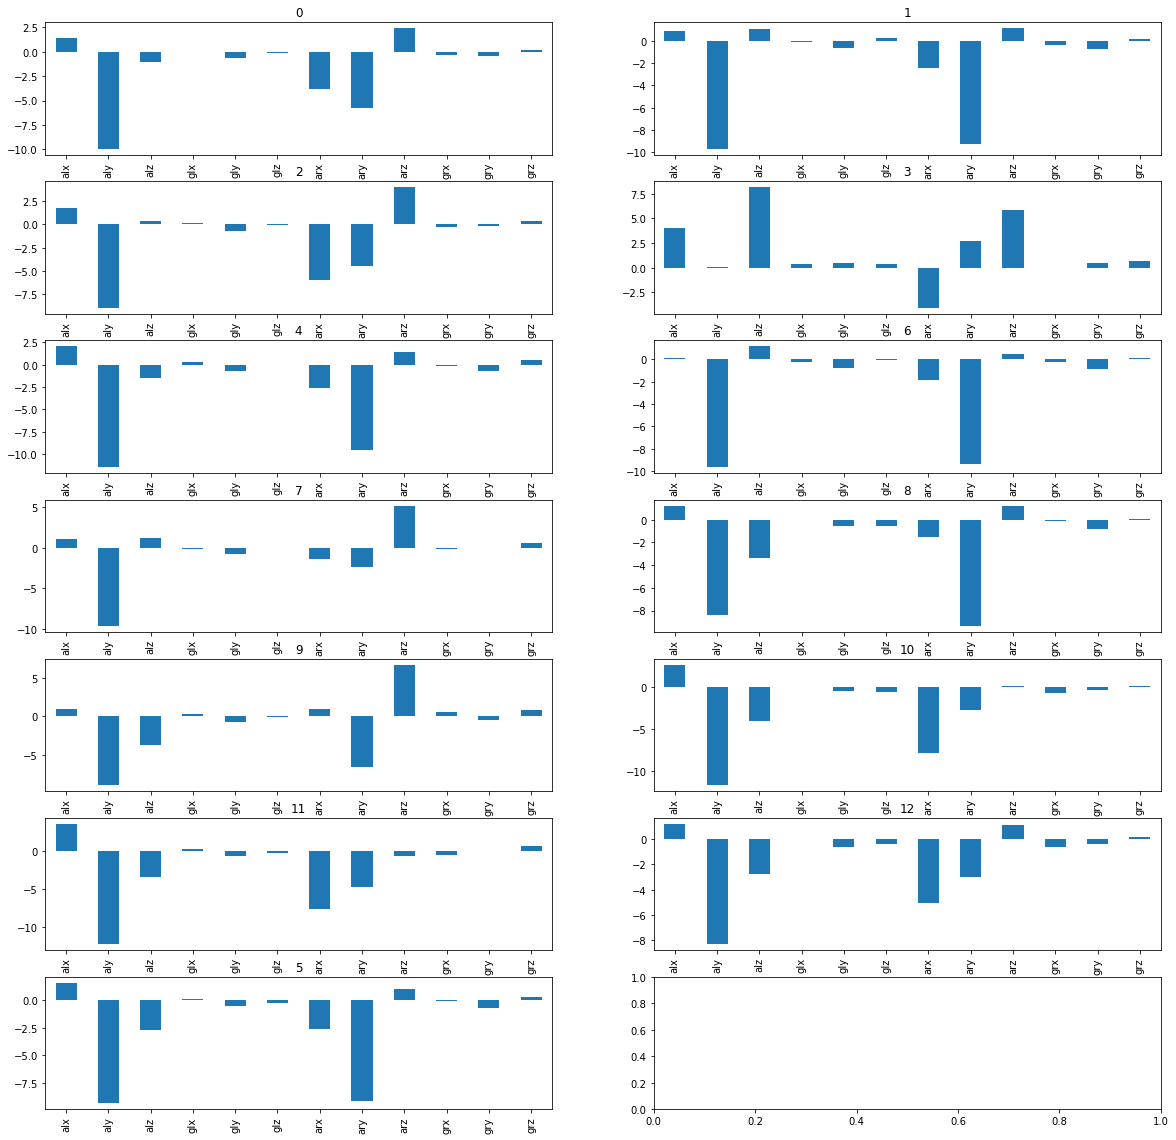

In [5]:
fig, axes = plt.subplots(figsize=(20, 20), nrows=7, ncols=2)

activity_grouped_data = data.groupby('Activity')

for i, activity in enumerate(data.Activity.unique()):
    activity_data = activity_grouped_data.get_group(activity)
    
    activity_data.drop(columns=['subject', 'Activity']).mean().plot.bar(ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(activity)

Из графиков выше видно, что активности неплохо разделимы между собой по показаниям сенсоров. Попробуем использовать понижение размерности для лучшей иллюстрации разделимости

In [6]:
from sklearn.decomposition import PCA

data_decomposed = PCA().fit_transform(data.drop(columns=['subject', 'Activity']))

In [7]:
data_decomposed

array([[ 2.90246455e+00,  3.24849972e-01, -4.68361133e+00, ...,
         3.38578877e-01,  5.45219416e-04,  1.42551863e-02],
       [ 3.12738446e+00,  1.88895403e-01, -4.61911116e+00, ...,
         3.51710965e-01, -5.65816429e-03, -6.61061499e-03],
       [ 3.14912240e+00,  1.57118221e-01, -4.45053607e+00, ...,
         3.50741833e-01, -7.41387688e-03,  3.96391476e-03],
       ...,
       [-2.14416545e+00,  2.80899605e+00, -1.33996410e+00, ...,
         2.11584249e-01,  1.84261983e-01, -3.16545018e-02],
       [-2.12834912e+00,  2.97308502e+00, -8.88319700e-01, ...,
         2.09285721e-01,  1.91546379e-01, -1.99554860e-02],
       [-1.94294615e+00,  2.71330219e+00, -1.19056103e+00, ...,
         2.37069112e-01,  1.69747976e-01, -2.14490204e-02]])

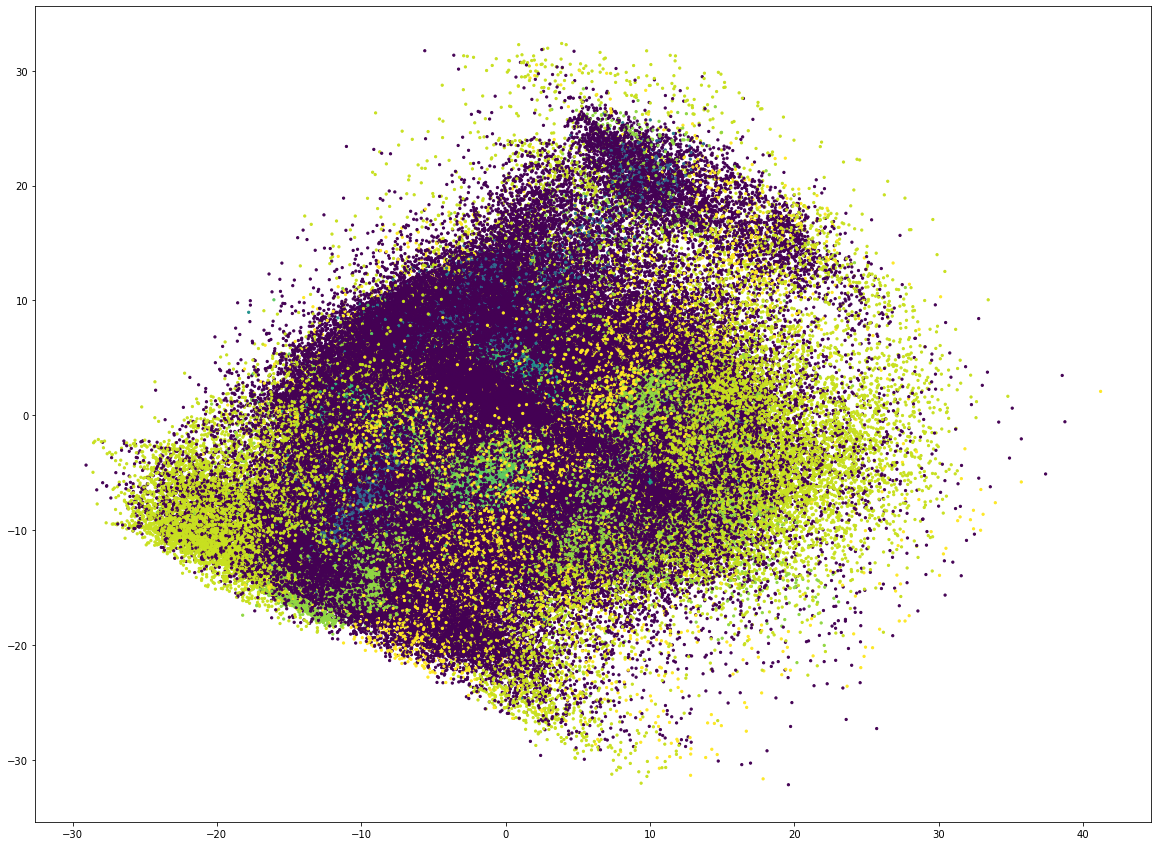

In [8]:
plt.figure(figsize=(20, 15))

plt.scatter(data_decomposed[:, 0], data_decomposed[:, 1], c = data.Activity, s=5)

PCA не смог продемонстрировать линейную разделимость. Возможно, в будущем используем более мощный инструмент

# Data preprocessing

Данные в хорошем состоянии, поэтому пока препроцессинг делать не будем. Колонку "subject" уберем т.к. в качестве категориального признака ее учесть нельзя (в будущем появятся новые subject'ы) и ее отсутствие поможет лучше подстроиться под движения людей в целом, а не subject'ов в частности.

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Activity', 'subject'])
y = data.Activity

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

assert X_train.shape[1] == X_val.shape[1]
assert X_train.shape[0] == y_train.shape[0]
assert X_val.shape[0] == y_val.shape[0]

print(f'X train shape - {X_train.shape}, y train shape - {y_train.shape}')
print(f'X val shape - {X_val.shape}, y val shape - {y_val.shape}')

X train shape - (972596, 12), y train shape - (972596,)
X val shape - (243149, 12), y val shape - (243149,)


# CatBoostClassifier

In [10]:
from catboost import CatBoostClassifier, metrics
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(classes=np.unique(y), y=y, class_weight='balanced')
class_weights = dict(zip(np.unique(y), class_weights))

clf = CatBoostClassifier(class_weights=class_weights, iterations=2000).fit(X_train, y_train, eval_set=(X_val, y_val),  early_stopping_rounds=50, verbose=100)

Learning rate set to 0.095081
0:	learn: 2.2351013	test: 2.2345144	best: 2.2345144 (0)	total: 615ms	remaining: 20m 30s
100:	learn: 0.3742287	test: 0.3765801	best: 0.3765801 (100)	total: 55.3s	remaining: 17m 20s
200:	learn: 0.2393153	test: 0.2438081	best: 0.2438081 (200)	total: 1m 50s	remaining: 16m 24s
300:	learn: 0.1884837	test: 0.1945849	best: 0.1945849 (300)	total: 2m 43s	remaining: 15m 24s
400:	learn: 0.1620040	test: 0.1692704	best: 0.1692704 (400)	total: 3m 37s	remaining: 14m 27s
500:	learn: 0.1438718	test: 0.1521733	best: 0.1521733 (500)	total: 4m 31s	remaining: 13m 31s
600:	learn: 0.1323572	test: 0.1414530	best: 0.1414530 (600)	total: 5m 24s	remaining: 12m 36s
700:	learn: 0.1230343	test: 0.1328376	best: 0.1328376 (700)	total: 6m 18s	remaining: 11m 41s
800:	learn: 0.1157357	test: 0.1261722	best: 0.1261722 (800)	total: 7m 12s	remaining: 10m 47s
900:	learn: 0.1098603	test: 0.1208964	best: 0.1208964 (900)	total: 8m 5s	remaining: 9m 52s
1000:	learn: 0.1052076	test: 0.1166340	best: 0.1

In [11]:
from sklearn.metrics import f1_score

f_score = f1_score(y_val, clf.predict(X_val)[:, 0], average="weighted")

print(f'Validation accuracy - {clf.score(X_val, y_val)}')
print(f'Validation f-score - {f_score}')

Validation accuracy - 0.8546158939580257
Validation f-score - 0.8627795363229632


# Not CatBoost

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier().fit(X_train, y_train)

In [13]:
from sklearn.metrics import f1_score

f_score = f1_score(y_val, knn_clf.predict(X_val), average="weighted")

print(f'Validation accuracy - {knn_clf.score(X_val, y_val)}')
print(f'Validation f-score - {f_score}')

Validation accuracy - 0.8572480248736372
Validation f-score - 0.8563805921595123


In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier().fit(X_train, y_train)

In [15]:
from sklearn.metrics import f1_score

f_score = f1_score(y_val, sgd_clf.predict(X_val), average="weighted")

print(f'Validation accuracy - {sgd_clf.score(X_val, y_val)}')
print(f'Validation f-score - {f_score}')

Validation accuracy - 0.723284899382683
Validation f-score - 0.6178535692518455
